In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [48]:
temp = pd.read_csv('GlobalTemperatures.csv')
maunaloa = pd.read_csv('maunaloa.csv')

In [49]:
co2_7923 = pd.read_csv('co2_1979_2023.csv')

In [50]:
temp.columns.values

array(['dt', 'LandAverageTemperature',
       'LandAverageTemperatureUncertainty', 'LandMaxTemperature',
       'LandMaxTemperatureUncertainty', 'LandMinTemperature',
       'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'], dtype=object)

In [51]:
maunaloa.columns.values

array(['Unnamed: 0', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Average'], dtype=object)

In [52]:
co2_7923.columns

Index(['year', 'mean', 'unc'], dtype='object')

In [53]:
temp = temp[['dt', 'LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature', 'LandAndOceanAverageTemperature']]

In [54]:
temp.columns

Index(['dt', 'LandAverageTemperature', 'LandMaxTemperature',
       'LandMinTemperature', 'LandAndOceanAverageTemperature'],
      dtype='object')

In [55]:
temp.shape

(3192, 5)

In [56]:
temp.insert(temp.columns.get_loc("LandAverageTemperature"), "year", 0)

In [57]:
temp.insert(temp.columns.get_loc("LandAverageTemperature"), "month", 0)

In [58]:
temp.head(5)

,dt,year,month,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
0,1750-01-01,0,0,3.034,NaN,NaN,NaN
1,1750-02-01,0,0,3.083,NaN,NaN,NaN
2,1750-03-01,0,0,5.626,NaN,NaN,NaN
3,1750-04-01,0,0,8.490,NaN,NaN,NaN
4,1750-05-01,0,0,11.573,NaN,NaN,NaN


In [59]:
temp.loc[0, 'dt'][:4]

'1750'

In [60]:
temp.loc[0, 'dt'][5:7]

'01'

In [61]:
temp.year = temp.dt.map(lambda x: int(x[:4]))       # less readable

# temp['year'] = [int(str(date)[:4]) for date in temp['dt']]
# for every "date" that is an element of temp['dt']
# str(date)[:4] => take the first 4 characters

In [62]:
temp.year.values

array([1750, 1750, 1750, ..., 2015, 2015, 2015], dtype=int64)

In [63]:
temp.month = temp.dt.map(lambda x: int(x[5:7]))

In [64]:
yearly_temp = pd.DataFrame(index=range(len(temp.year.unique())), columns = ['year','land','landmax','landmin','landocean'])
# also index=temp.year.nunique() 
#temp_df.empty:

In [65]:
yearly_temp.tail(5)

,year,land,landmax,landmin,landocean
261,NaN,NaN,NaN,NaN,NaN
262,NaN,NaN,NaN,NaN,NaN
263,NaN,NaN,NaN,NaN,NaN
264,NaN,NaN,NaN,NaN,NaN
265,NaN,NaN,NaN,NaN,NaN


In [66]:
yearly_temp.year=temp.year.unique()   # might not preserve order - should sort
# sorted([year for year in temp['year'].unique()])
#[year for year in temp['year'].unique()] = list of all the available years and then you explicityly sor the list

In [67]:
yearly_temp.tail(5)

,year,land,landmax,landmin,landocean
261,2011,NaN,NaN,NaN,NaN
262,2012,NaN,NaN,NaN,NaN
263,2013,NaN,NaN,NaN,NaN
264,2014,NaN,NaN,NaN,NaN
265,2015,NaN,NaN,NaN,NaN


In [68]:
yearly_temp.land = temp.groupby('year').LandAverageTemperature.mean().values
yearly_temp.landmax = temp.groupby('year').LandMaxTemperature.mean().values
yearly_temp.landmin = temp.groupby('year').LandMinTemperature.mean().values
yearly_temp.landocean = temp.groupby('year').LandAndOceanAverageTemperature.mean().values

# should also try groupby.apply on a slice, temp_df = pd.DataFrame(...)
# when you assign a variable, you add spaces on each side of the equal sign
# When you pass arguments to a function, you DON'T add spaces anywhere
# pd.DataFrame(columns=['col1', 'col2'])

In [69]:
yearly_temp.tail(5)

,year,land,landmax,landmin,landocean
261,2011,9.516000,15.284833,3.827667,15.769500
262,2012,9.507333,15.332833,3.756167,15.802333
263,2013,9.606500,15.373833,3.911333,15.854417
264,2014,9.570667,15.313583,3.877750,15.913000
265,2015,9.831000,15.572667,4.148833,16.058583


In [70]:
 maunaloa.rename(columns = {maunaloa.columns[0] : 'year'}, inplace = True)

In [71]:
maunaloa.columns

Index(['year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Average'],
      dtype='object')

In [72]:
maunaloa.loc[0, 'Average'] = maunaloa.loc[0, 'Mar':'Dec'].mean()

In [73]:
maunaloa.Average[0]

315.234

In [74]:
co2temp = yearly_temp

In [75]:
co2temp['co2'] = 0
co2temp['co2_maunaloa'] = 0
co2temp['co2_7923'] = 0
co2temp.head(1)

,year,land,landmax,landmin,landocean,co2,co2_maunaloa,co2_7923
0,1750,8.719364,NaN,NaN,NaN,0,0,0


In [76]:
co2temp[co2temp.year==1958]

,year,land,landmax,landmin,landocean,co2,co2_maunaloa,co2_7923
208,1958,8.77375,14.4775,3.1145,15.382083,0,0,0


In [77]:
co2temp.drop(co2temp.index[:208]).head(1)

,year,land,landmax,landmin,landocean,co2,co2_maunaloa,co2_7923
208,1958,8.77375,14.4775,3.1145,15.382083,0,0,0


In [78]:
co2temp = co2temp.drop(co2temp.index[:208])

In [79]:
co2temp = co2temp.set_index('year', drop=False)
co2temp.head(1)

,year,land,landmax,landmin,landocean,co2,co2_maunaloa,co2_7923
year,,,,,,,,
1958,1958,8.77375,14.4775,3.1145,15.382083,0,0,0


In [80]:
co2temp.loc[:2008, 'co2_maunaloa'] = maunaloa.Average.values

C:\Users\THW\AppData\Local\Temp\ipykernel_7804\4166472702.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[315.234 315.98  316.91  317.64  318.45  318.99  -99.99  320.04  321.38
 322.16  323.05  324.63  325.68  326.32  327.45  329.68  330.25  331.15
 332.15  333.9   335.51  336.85  338.69  339.93  341.13  342.78  344.42
 345.9   347.15  348.93  351.48  352.91  354.19  355.59  356.37  357.04
 358.89  360.88  362.64  363.76  366.63  368.31  369.48  371.02  373.1
 375.64  377.38  379.67  381.84  383.55  385.34 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  co2temp.loc[:2008, 'co2_maunaloa'] = maunaloa.Average.values


In [81]:
co2temp.loc[1979:, 'co2_7923'] = co2_7923.loc[:36,'mean'].values

C:\Users\THW\AppData\Local\Temp\ipykernel_7804\3340038629.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[336.85 338.91 340.11 340.86 342.53 344.07 345.54 346.97 348.68 351.16
 352.79 354.06 355.39 356.09 356.83 358.33 360.17 361.93 363.05 365.7
 367.79 368.96 370.57 372.58 375.14 376.95 378.98 381.15 382.9  385.02
 386.5  388.76 390.63 392.65 395.4  397.34 399.65]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  co2temp.loc[1979:, 'co2_7923'] = co2_7923.loc[:36,'mean'].values


In [82]:
co2temp.loc[co2temp.co2_maunaloa==0, 'co2'] = co2temp.loc[co2temp.co2_maunaloa==0, 'co2_7923']

C:\Users\THW\AppData\Local\Temp\ipykernel_7804\3836187366.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[386.5  388.76 390.63 392.65 395.4  397.34 399.65]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  co2temp.loc[co2temp.co2_maunaloa==0, 'co2'] = co2temp.loc[co2temp.co2_maunaloa==0, 'co2_7923']


In [83]:
co2temp.loc[co2temp.co2==0, 'co2'] = co2temp.loc[co2temp.co2==0, 'co2_maunaloa']

In [84]:
co2temp = co2temp.drop(columns = ['co2_maunaloa', 'co2_7923'])

In [85]:
maunaloa.loc[maunaloa.year==1964]

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Average
6,1964,319.57,-99.99,-99.99,-99.99,322.24,321.89,320.44,318.7,316.7,316.79,317.79,318.71,-99.99


In [86]:
co2temp.loc[1964, 'co2'] = maunaloa.loc[6, ['Jan', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean()
# also condition

In [89]:
co2temp

,year,land,landmax,landmin,landocean,co2
year,,,,,,
1958,1958,8.773750,14.477500,3.114500,15.382083,315.234000
1959,1959,8.732667,14.416500,3.108583,15.340500,315.980000
1960,1960,8.583750,14.317417,2.932583,15.291917,316.910000
1961,1961,8.797667,14.514917,3.128750,15.379917,317.640000
1962,1962,8.745917,14.540167,3.008583,15.325583,318.450000
1963,1963,8.856000,14.612250,3.157583,15.376667,318.990000
1964,1964,8.409667,14.156833,2.768833,15.117083,319.203333
1965,1965,8.527417,14.268417,2.841417,15.195750,320.040000
1966,1966,8.599333,14.325917,2.899417,15.264667,321.380000


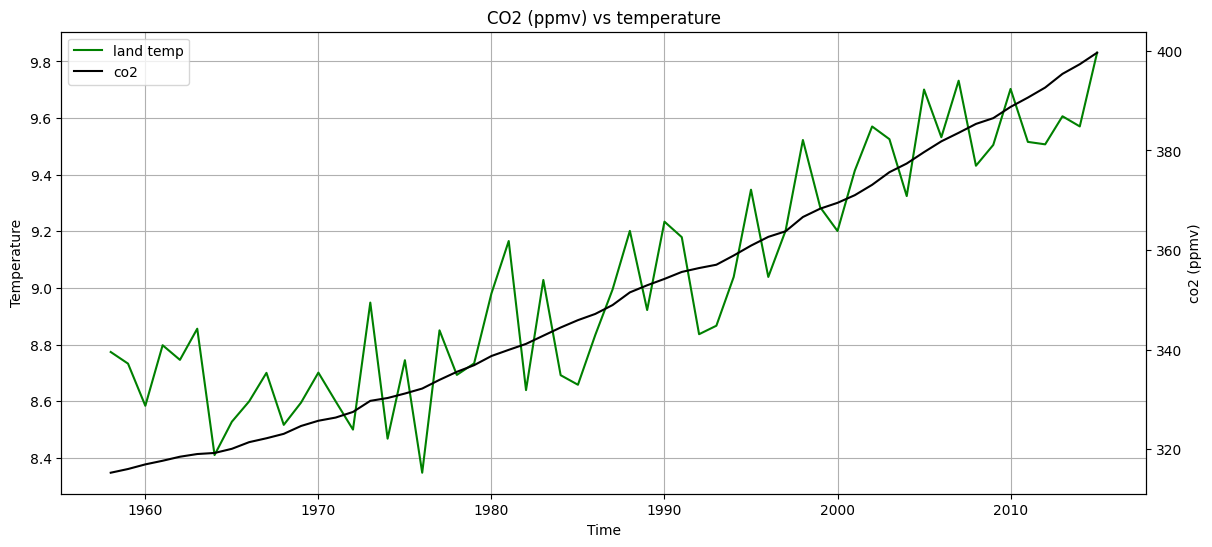

In [88]:
fig, ax = plt.subplots(figsize=(14, 6))
axb = ax.twinx()

ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('CO2 (ppmv) vs temperature')
ax.grid(True)

# First y axis
ax.plot(co2temp.year, co2temp.land, color='green', label='land temp')
#ax.plot(co2tempdiff.index, co2_temp.landoceanavg, color='blue', linestyle='--', label='land + ocean temp')
#ax.plot(co2tempdiff.index, co2_temp.landmin, color='green', linestyle='--', label='land minimum')
#ax.plot(co2tempdiff.index, co2_temp.landmax, color='red', linestyle='--', label='land minimum')

# Second y-axis
axb.set_ylabel('co2 (ppmv)')
axb.plot(co2temp.year, co2temp.co2, color='black', label='co2')

# Handling of getting lines and labels from all axes for a single legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axb.get_legend_handles_labels()
axb.legend(lines + lines2, labels + labels2, loc='upper left');

In [90]:
co2tempdiff = co2temp.copy()

In [92]:
data_cols = co2temp.columns[1:]

In [94]:
for col in data_cols:
    co2tempdiff[col] = co2tempdiff[col].diff(periods=1)

In [96]:
co2tempdiff = co2tempdiff.dropna()

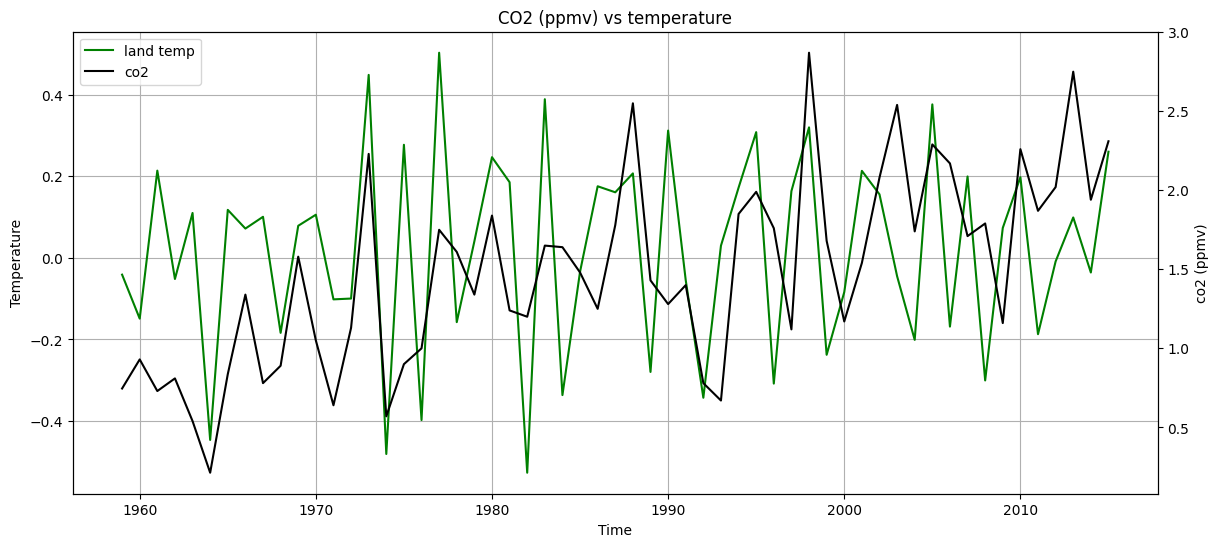

In [98]:
fig, ax = plt.subplots(figsize=(14, 6))
axb = ax.twinx()

ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('CO2 (ppmv) vs temperature')
ax.grid(True)

# First y axis
ax.plot(co2tempdiff.year, co2tempdiff.land, color='green', label='land temp')
#ax.plot(co2tempdiff.index, co2_temp.landoceanavg, color='blue', linestyle='--', label='land + ocean temp')
#ax.plot(co2tempdiff.index, co2_temp.landmin, color='green', linestyle='--', label='land minimum')
#ax.plot(co2tempdiff.index, co2_temp.landmax, color='red', linestyle='--', label='land minimum')

# Second y-axis
axb.set_ylabel('co2 (ppmv)')
axb.plot(co2tempdiff.year, co2tempdiff.co2, color='black', label='co2')

# Handling of getting lines and labels from all axes for a single legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axb.get_legend_handles_labels()
axb.legend(lines + lines2, labels + labels2, loc='upper left');

In [99]:
from statsmodels.tsa.stattools import adfuller

In [100]:
adfuller(co2tempdiff['co2'])

(-1.5267646809154056,
 0.520232145949335,
 9,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 64.37434425178998)

In [101]:
adfuller(co2tempdiff['land'])

(-3.7516628463909,
 0.003442445044532154,
 7,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 -25.75645430024177)

In [103]:
co2tempdiff['co2_2diff']=co2tempdiff.co2.diff(periods=1)

C:\Users\THW\AppData\Local\Temp\ipykernel_7804\348222831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2tempdiff['co2_2diff']=co2tempdiff.co2.diff(periods=1)


In [105]:
co2tempdiff = co2tempdiff.dropna()

In [106]:
adfuller(co2tempdiff['co2_2diff'])

(-4.832115009592115,
 4.7192937195166496e-05,
 8,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 64.62457336783152)

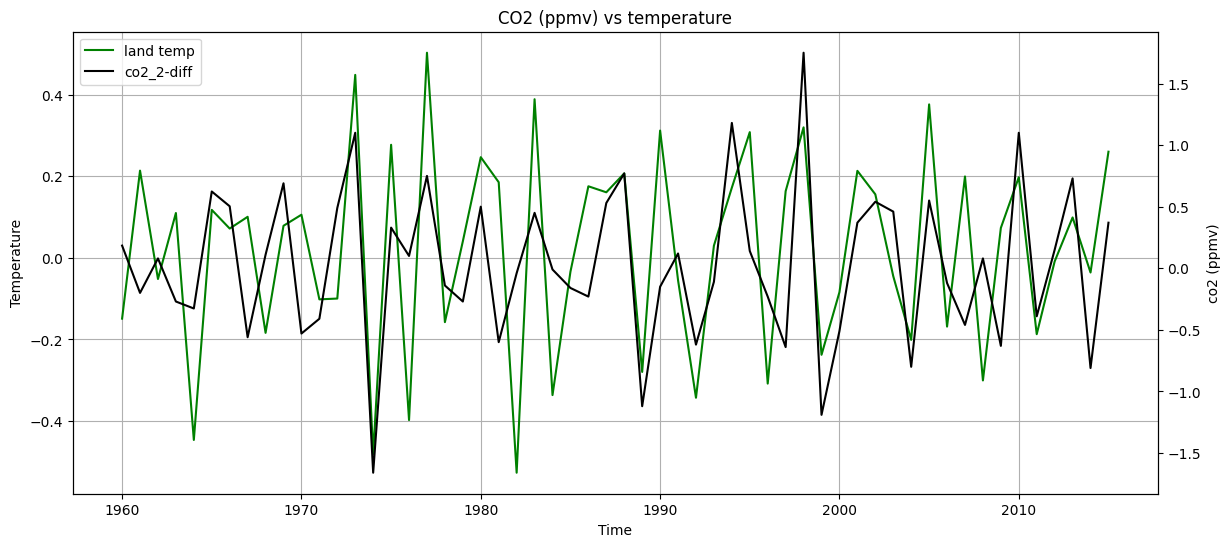

In [107]:
fig, ax = plt.subplots(figsize=(14, 6))
axb = ax.twinx()

ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('CO2 (ppmv) vs temperature')
ax.grid(True)

# First y axis
ax.plot(co2tempdiff.year, co2tempdiff.land, color='green', label='land temp')
#ax.plot(co2tempdiff.index, co2_temp.landoceanavg, color='blue', linestyle='--', label='land + ocean temp')
#ax.plot(co2tempdiff.index, co2_temp.landmin, color='green', linestyle='--', label='land minimum')
#ax.plot(co2tempdiff.index, co2_temp.landmax, color='red', linestyle='--', label='land minimum')

# Second y-axis
axb.set_ylabel('co2 (ppmv)')
axb.plot(co2tempdiff.year, co2tempdiff.co2_2diff, color='black', label='co2_2-diff')

# Handling of getting lines and labels from all axes for a single legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axb.get_legend_handles_labels()
axb.legend(lines + lines2, labels + labels2, loc='upper left');

In [108]:
import statsmodels.formula.api as smf

In [109]:
mod = smf.ols('land ~ co2_2diff', data=co2tempdiff)
res = mod.fit()

mod_with_robust_errors = res.get_robustcov_results(cov_type='HC1', use_t=None)
print(mod_with_robust_errors.summary())

                            OLS Regression Results                            
Dep. Variable:                   land   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     43.47
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           1.88e-08
Time:                        18:19:05   Log-Likelihood:                 9.1674
No. Observations:                  56   AIC:                            -14.33
Df Residuals:                      54   BIC:                            -10.28
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0138      0.028      0.491      0.6

In [110]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   land   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     22.00
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           1.90e-05
Time:                        18:28:29   Log-Likelihood:                 9.1674
No. Observations:                  56   AIC:                            -14.33
Df Residuals:                      54   BIC:                            -10.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0138      0.028      0.492      0.6

In [112]:
co2tempdiff['co2_2diff_1lag']=co2tempdiff.co2_2diff.shift(-1)

C:\Users\THW\AppData\Local\Temp\ipykernel_7804\4153753728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2tempdiff['co2_2diff_1lag']=co2tempdiff.co2_2diff.shift(-1)


In [113]:
co2tempdiff['co2_2diff_2lag']=co2tempdiff.co2_2diff.shift(-2)

C:\Users\THW\AppData\Local\Temp\ipykernel_7804\1786010046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2tempdiff['co2_2diff_2lag']=co2tempdiff.co2_2diff.shift(-2)


In [115]:
co2tempdiff = co2tempdiff.dropna()

In [116]:
mod = smf.ols('land ~ co2_2diff_1lag', data=co2tempdiff)
res = mod.fit()

mod_with_robust_errors = res.get_robustcov_results(cov_type='HC1', use_t=None)
print(mod_with_robust_errors.summary())

                            OLS Regression Results                            
Dep. Variable:                   land   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.131
Date:                Sun, 31 Mar 2024   Prob (F-statistic):              0.150
Time:                        18:33:37   Log-Likelihood:               0.083132
No. Observations:                  54   AIC:                             3.834
Df Residuals:                      52   BIC:                             7.812
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0175      0.034      0.

In [117]:
mod = smf.ols('land ~ co2_2diff_2lag', data=co2tempdiff)
res = mod.fit()

mod_with_robust_errors = res.get_robustcov_results(cov_type='HC1', use_t=None)
print(mod_with_robust_errors.summary())

                            OLS Regression Results                            
Dep. Variable:                   land   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     7.826
Date:                Sun, 31 Mar 2024   Prob (F-statistic):            0.00720
Time:                        18:34:01   Log-Likelihood:                 1.7578
No. Observations:                  54   AIC:                            0.4844
Df Residuals:                      52   BIC:                             4.462
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0196      0.033      0.

In [118]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   land   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     5.303
Date:                Sun, 31 Mar 2024   Prob (F-statistic):             0.0253
Time:                        18:34:32   Log-Likelihood:                 1.7578
No. Observations:                  54   AIC:                            0.4844
Df Residuals:                      52   BIC:                             4.462
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0196      0.033      0.

In [119]:
co2tempdiff['co2_2diff_sq'] = co2tempdiff['co2_2diff'] ** 2

C:\Users\THW\AppData\Local\Temp\ipykernel_7804\159643854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2tempdiff['co2_2diff_sq'] = co2tempdiff['co2_2diff'] ** 2


In [121]:
mod = smf.ols('land ~ co2_2diff_sq', data=co2tempdiff)
res = mod.fit()

mod_with_robust_errors = res.get_robustcov_results(cov_type='HC1', use_t=None)
print(mod_with_robust_errors.summary())

                            OLS Regression Results                            
Dep. Variable:                   land   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                   0.08136
Date:                Sun, 31 Mar 2024   Prob (F-statistic):              0.777
Time:                        18:42:49   Log-Likelihood:               -0.77320
No. Observations:                  54   AIC:                             5.546
Df Residuals:                      52   BIC:                             9.524
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0070      0.041      0.170   

In [122]:
# by differencing and thus eliminating the influence of trend we assure the independence of samples assumption of regression

In [123]:
# we obtained statistical significance by comparing the relation between the first derivative
# of land temperature and the second derivative of co2 concentration
# this fact and the fact that we also obtained statistical significance by comparing land temperature and 
# the 2nd year lag of co2 concentration suggests that the relationship between temperature and co2 may not be linear 